### Imports
This notebook uses libsumo instead of TraCI. libsumo is much faster, but will not work with sumo-gui.

In [1]:
import libsumo as traci # remove 'libsumo as' to use traci instead of libsumo. Requires the same in datacollector.py also 
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, List
from data_collector import DataCollector
from metrics import WaitingTime, Throughput
from visualisation import FundamentalDiagram, TimeDistance

# Basics
This section shows how to use the library with sumo and TraCI

### Starting SUMO with libsumo/TraCI

In [2]:
if traci.isLoaded(): 
    traci.close()
sumo_binary = "sumo"  # use "sumo-gui" for non-GUI mode
sumo_config = "Grid8/2_to_3.sumocfg" # .sumocfg file specifying network and routes
sumo_command = [sumo_binary, "-c", sumo_config]  
traci.start(sumo_command)
print(f"{sumo_binary} started")

sumo started


### Initialising DataCollector
Initialising the Data collector and adding the metrics and visualisations

In [3]:
dc = DataCollector()
dc.add_waiting_time(WaitingTime())
dc.add_throughput(Throughput())
dc.add_fundamental_diagram(FundamentalDiagram('C3B3'))  # Generate the fundamental diagram on edge C3B3
dc.add_time_distance_diagram(TimeDistance(('A3B3','G3H3'),(0,150))) # Generate time distance diagram for vehicles from 'A3B3' to 'G3H3' in the time interval 0 to 60.

In [4]:
dc.initialised()

True

### Running the simulation

In [5]:
traci.trafficlight.setProgram('D3','0') # load the default program for Traffic Light at D3
while traci.simulation.getMinExpectedNumber() > 0:
    traci.simulationStep()
dc.stop_collecting() # must call to avoid further collection of data.
print("finish")

finish


### Retreiving the Data

In [6]:
df_waiting_time = dc.waiting_time.to_dataframe()
df_throughput = dc.throughput.to_dataframe()

Filtering out the edges without any data

In [7]:
df_waiting_time_filtered = df_waiting_time.loc[:, (df_waiting_time != 0).any(axis=0)]
df_throughput_filtered = df_throughput.loc[:, (df_throughput != 0).any(axis=0)]

In [8]:
df_waiting_time_filtered.describe()

,:G3_2,A3B3,B3A3,B3C3,C2B2,C2C3,C2D2,C3B3,C3D3,C4D4,...,E3D3,E4D4,E4E3,F2G2,F3E3,F3G3,G3F3,G3H3,G4G3,H3G3
count,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,...,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000
mean,0.035248,0.077107,0.299966,0.819891,0.037561,0.005648,1.531160,0.059479,2.813158,1.763104,...,2.590782,0.510050,0.136840,0.059041,1.179411,0.292039,0.001497,0.000034,0.007893,0.037831
std,0.614009,0.535129,1.987407,2.078715,0.494282,0.172459,5.439587,0.739913,4.234543,5.606044,...,4.127941,2.749065,1.006136,0.542113,2.527522,1.752401,0.050458,0.002916,0.220138,0.371462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,0.000000,...,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,8.000000,32.000000,16.000000,11.250000,8.000000,56.000000,17.500000,16.000000,63.000000,...,15.500000,34.666667,15.000000,11.000000,16.500000,27.000000,3.000000,0.250000,9.000000,9.000000


In [9]:
df_throughput_filtered.describe()

,:A2_3,:A3_5,:A3_6,:B2_16,:B2_2,:B2_5,:B3_0,:B3_12,:B3_13,:B3_14,...,G3F3,G3G2,G3H3,G4F4,G4G3,H2G2,H3G3,H3H2,H3H4,H4G4
count,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,...,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000
mean,0.041644,0.094447,0.041644,0.020958,0.017556,0.041644,0.010343,0.020958,0.093359,0.021775,...,0.086282,0.000680,0.272183,0.010343,0.017284,0.038786,0.086962,0.038786,0.010343,0.010343
std,0.199788,0.292470,0.199788,0.143254,0.131339,0.199788,0.101180,0.143254,0.290954,0.145957,...,0.280799,0.026078,0.445114,0.101180,0.130335,0.193098,0.281799,0.193098,0.101180,0.101180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plotting the Fundamental diagram

/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


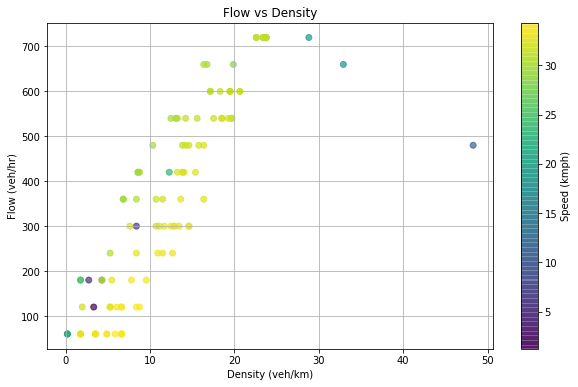

In [11]:
fig,axes = dc.fundamental_diagram.plot()
fig.show()

### Plotting the Time - Distance diagram 

/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launche

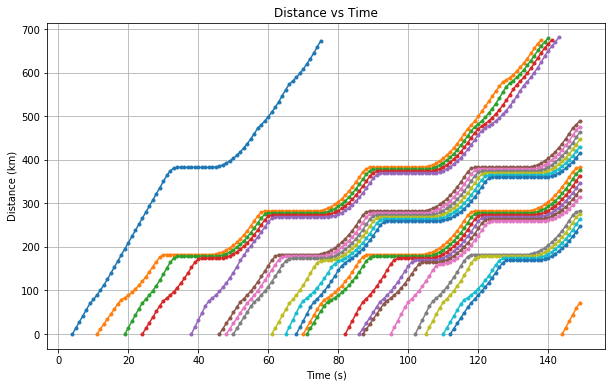

In [12]:
fig,axes = dc.time_distance_diagram.plot()
fig.show()

## Experiments

In [13]:
def run_simulation(traffic_scale = 1, d3_pgid : str= '0'):
    traci.simulation.load([ "-c",sumo_config])
    traci.simulation.setScale(traffic_scale) # sets the traffic scale (multiplies the number of vehicles)
    
    traci.trafficlight.setProgram('D3',d3_pgid) # set the program for Traffic Light D3
    
    dc = DataCollector()
    dc.add_waiting_time(WaitingTime())
    dc.add_throughput(Throughput())
    dc.add_fundamental_diagram(FundamentalDiagram('C3B3')) 
    dc.add_time_distance_diagram(TimeDistance(('A3B3','G3H3'),(50,200)))
    assert(dc.initialised())
    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
    dc.stop_collecting()
    df_waiting_time_filtered = df_waiting_time.loc[:, (df_waiting_time != 0).any(axis=0)] # removing columns with all zero values
    df_throughput_filtered = df_throughput.loc[:, (df_throughput != 0).any(axis=0)]
    return dc, df_waiting_time_filtered, df_throughput_filtered

## Scale = 1

/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplo

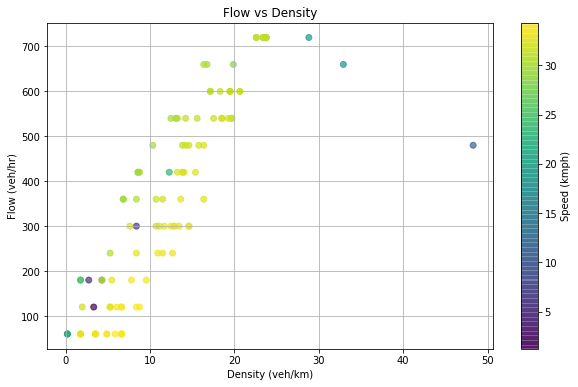

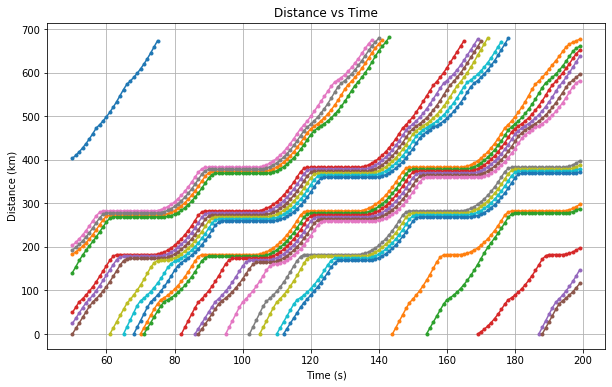

In [14]:
dc,df_wt,df_tp = run_simulation(traffic_scale=1)
fig,ax = dc.fundamental_diagram.plot()
fig.show()
fig,ax = dc.time_distance_diagram.plot()
fig.show()

### With traffic scaled by 2

/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplo

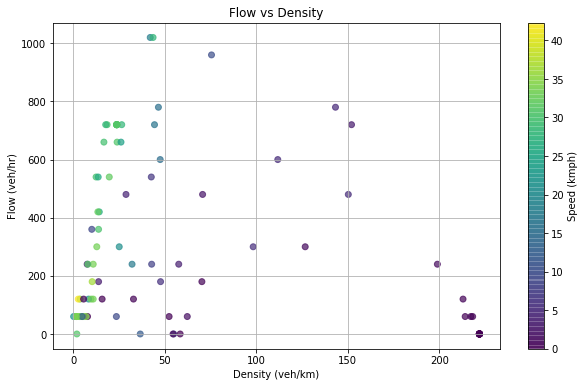

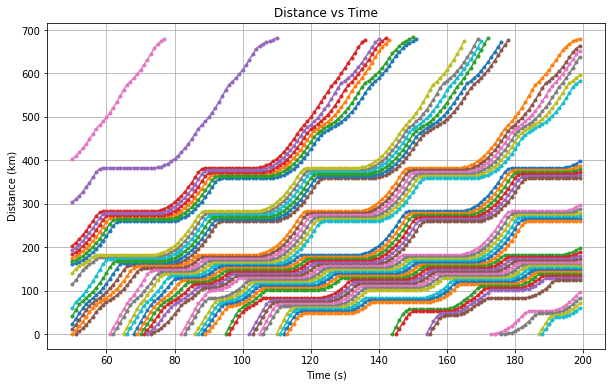

In [15]:
dc,df_wt,df_tp = run_simulation(traffic_scale=2)
fig,ax = dc.fundamental_diagram.plot()
fig.show()
fig,ax = dc.time_distance_diagram.plot()
fig.show()

### Scale = 1 and TL D3 at 15s offset
The 15s offset is same as the split duration

/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplo

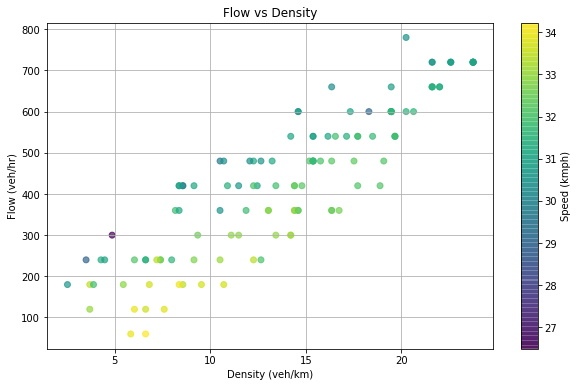

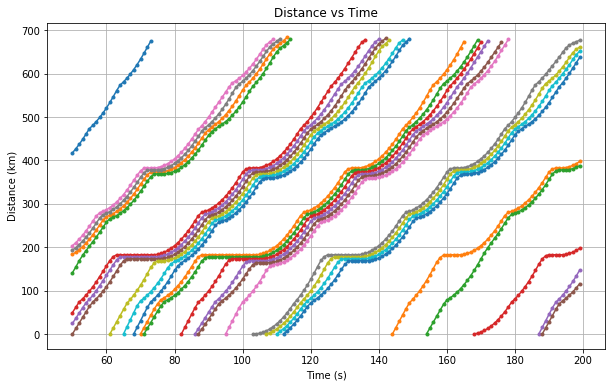

In [16]:
dc,df_wt,df_tp = run_simulation(traffic_scale=1,d3_pgid='offset_15')
fig,ax = dc.fundamental_diagram.plot()
fig.show()
fig,ax = dc.time_distance_diagram.plot()
fig.show()

### Scale = 2 and TL D3 at 15s offset

/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/sankar/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplo

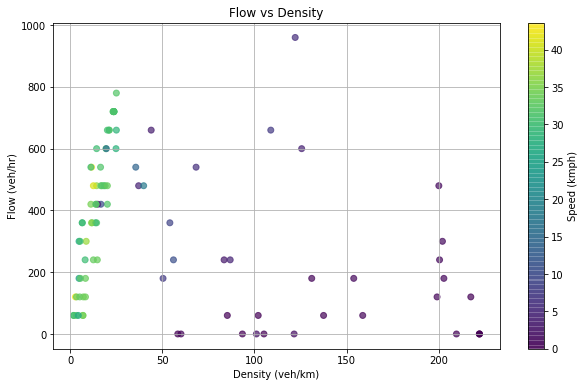

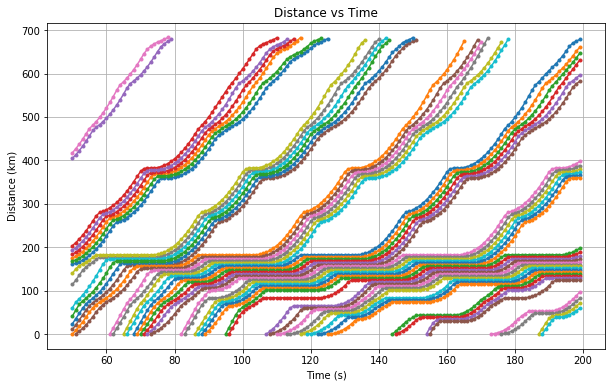

In [17]:
dc,df_wt,df_tp = run_simulation(traffic_scale=2,d3_pgid='offset_15')
fig,ax = dc.fundamental_diagram.plot()
fig.show()
fig,ax = dc.time_distance_diagram.plot()
fig.show()